In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Data Loading and Cleaning

In [9]:
retail = pd.read_csv('retail_sales_dataset.csv')

In [11]:
print(retail.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [13]:
retail.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [15]:
retail.shape

(1000, 9)

In [17]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [19]:
retail.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [21]:
## to check for missing values
print(retail.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


## No missing values found in the columns

In [23]:
## to check data types
print(retail.dtypes)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [25]:
## converting the date column to datetime
retail['Date'] = pd.to_datetime(retail['Date'])

In [27]:
print(retail.dtypes)

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


In [29]:
## checking for duplicates
retail.duplicated().sum()

0

## Descriptive Statistics

In [31]:
## for total amount
mean_total_amount = retail['Total Amount'].mean()
print("mean Total Amount:",mean_total_amount)

median_total_amount = retail['Total Amount'].median()
print("median Total Amount:", median_total_amount)

mode_total_amount = retail['Total Amount'].mode()[0]
print("mode Total Amount:", mode_total_amount)

std_total_amount = retail['Total Amount'].std()
print("standard deviation Total Amount:", std_total_amount)

mean Total Amount: 456.0
median Total Amount: 135.0
mode Total Amount: 50
standard deviation Total Amount: 559.997631555123


In [33]:
## for age 
mean_Age = retail['Age'].mean()
print("mean Age:",mean_Age)

median_Age = retail['Age'].median()
print("median Age:", median_Age)

mode_Age = retail['Age'].mode()[0]
print("mode Age:", mode_Age)

std_Age = retail['Age'].std()
print("standard deviation Age:", std_Age)

mean Age: 41.392
median Age: 42.0
mode Age: 43
standard deviation Age: 13.681429659122532


In [35]:
## for quantity column
mean_quantity = retail['Quantity'].mean()
print("mean Quantity:", mean_quantity)

median_quantity = retail['Quantity'].median()
print("median Quantity:", median_quantity)

mode_quantity = retail['Quantity'].mode()[0]
print("mode Quantity:", mode_quantity)

std_quantity = retail['Quantity'].std()
print("standard deviation:", std_quantity)

mean Quantity: 2.514
median Quantity: 3.0
mode Quantity: 4
standard deviation: 1.1327343409145405


In [37]:
## for price per unit column
mean_PPU = retail['Price per Unit'].mean()
print("mean price per unit:", mean_PPU)

median_PPU = retail['Price per Unit'].median()
print("median price per unit:", median_PPU)

mode_PPU = retail['Price per Unit'].mode()[0]
print("mode price per unit:", mode_PPU)

std_PPU = retail['Price per Unit'].std()
print("standard deviation price per unit:", std_PPU)

mean price per unit: 179.89
median price per unit: 50.0
mode price per unit: 50
standard deviation price per unit: 189.68135627129138


In [39]:
## for product category
# frequency counts
product_category_counts = retail['Product Category'].value_counts()
print("Frequency counts:\n",product_category_counts)

# mode
product_category_mode = retail['Product Category'].mode()[0]
print("mode product category:", product_category_mode)

#unique values
product_category_unique = retail['Product Category'].nunique()
print("unique count:", product_category_unique)

#proportions
product_category_proportions = retail['Product Category'].value_counts(normalize=True) * 100
print("proportions(%):\n",product_category_proportions)

Frequency counts:
 Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64
mode product category: Clothing
unique count: 3
proportions(%):
 Product Category
Clothing       35.1
Electronics    34.2
Beauty         30.7
Name: proportion, dtype: float64


#### From the above result, clothing is the most frequently purchased category 

In [41]:
## for Gender
# frequency counts
gender_frequency_counts = retail['Gender'].value_counts()
print("frequency counts:\n", gender_frequency_counts)

#mode
gender_mode = retail['Gender'].mode()[0]
print("mode gender:", gender_mode)

#unique values
gender_unique = retail['Gender'].nunique()
print("unique count:", gender_unique)

#proportions
gender_proportions = retail['Gender'].value_counts(normalize=True) * 100
print("proportions(%):\n", gender_proportions)

frequency counts:
 Gender
Female    510
Male      490
Name: count, dtype: int64
mode gender: Female
unique count: 2
proportions(%):
 Gender
Female    51.0
Male      49.0
Name: proportion, dtype: float64


#### The above statistics shows that there are more female customers than male customers but the difference is minimal

In [43]:
##calculating sum of total amount
sum_total_amount = retail['Total Amount'].sum()
print("sum of total amount is:", sum_total_amount)

sum of total amount is: 456000


In [45]:
# 1 How does customer age and gender influence their purchasing behavior?
# find out the unique ages 
retail['Age'].unique()

array([34, 26, 50, 37, 30, 45, 46, 63, 52, 23, 35, 22, 64, 42, 19, 27, 47,
       62, 18, 49, 28, 38, 43, 39, 44, 51, 58, 48, 55, 20, 40, 54, 36, 31,
       21, 57, 25, 56, 29, 61, 32, 41, 59, 60, 33, 53, 24], dtype=int64)

In [47]:
# group the ages using bins and labels
age_bins = [16,35,55,100]
age_labels = ['16-35','35-55','55-100']

retail['age_group'] = pd.cut(retail['Age'],bins=age_bins,labels=age_labels, right=False)

# group by gender, age group and sum og total amount
retail.groupby(['Gender','age_group'])['Total Amount'].sum()

C:\Users\H P\AppData\Local\Temp\ipykernel_11672\2180941365.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retail.groupby(['Gender','age_group'])['Total Amount'].sum()


Gender  age_group
Female  16-35        87770
        35-55        99790
        55-100       45280
Male    16-35        83970
        35-55        94280
        55-100       44910
Name: Total Amount, dtype: int64

### Observations :
1. The female customers generally have a higher total amount in each age group compared to males, especially in the 35-55 age group
2. The total amounts for both genders are lower in the 55-100 years group, which could reflect reduced earning potential or other factors associated with older age.
3. While Females tend to have slightly higher total amounts than Males in each group, the gap is most noticeable in the 35-55 years category (99,790 vs. 94,280). This could suggest that, within this age group, females may be engaging in more income-generating activities, or it could reflect other socio-economic factors.
4. The 55-100 years age group has the least total amount for both genders, possibly reflecting retirement, reduced income sources, or decreased economic participation.


In [49]:
## 2. Are there discernible patterns in sales across different time periods?
# to analyze sales patterns across different time periods i will extract month, day and quarter from my date by creating new columns
# and then plot bar charts for each

retail['Day of week'] = retail['Date'].dt.day_name()
retail['month'] = retail['Date'].dt.month
retail['Quarter'] = retail['Date'].dt.quarter

In [51]:
#group by weekday
weekday_sales = retail.groupby('Day of week')['Total Amount'].sum()

# group by month
monthly_sales = retail.groupby('month')['Total Amount'].sum()

# group by quarter
Quarterly_sales = retail.groupby('Quarter')['Total Amount'].sum()

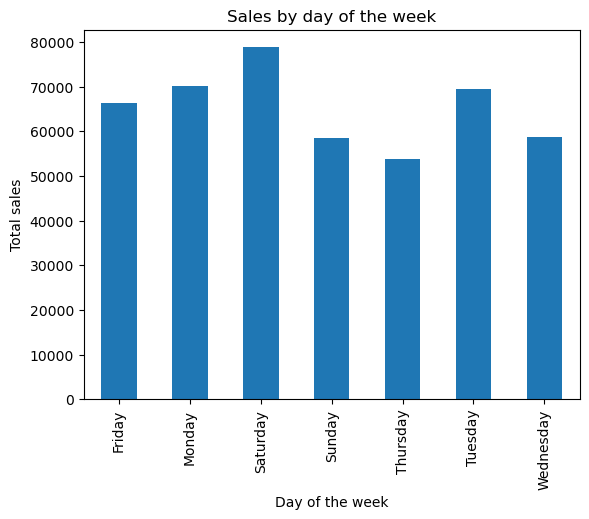

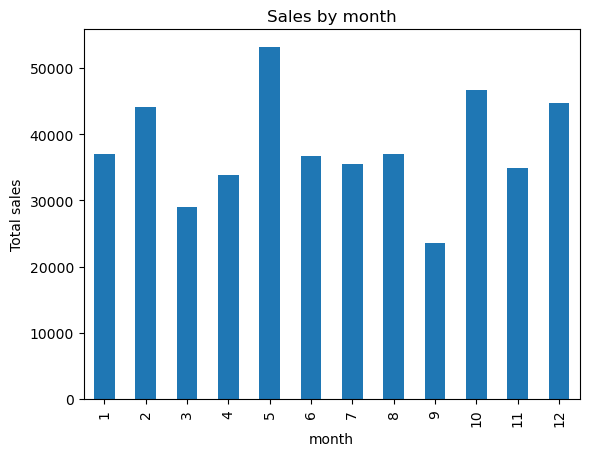

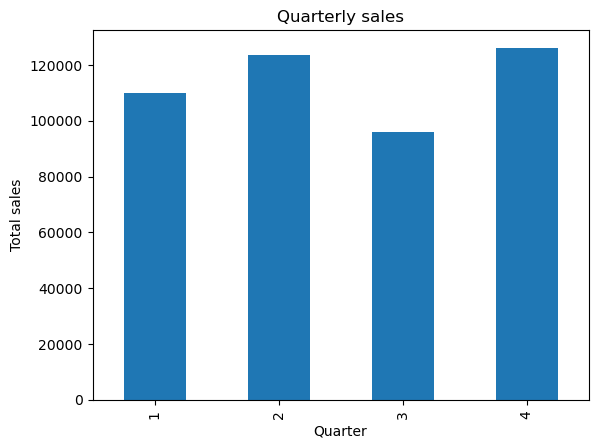

In [53]:
# plot a bar chart for weekday sales
weekday_sales.plot(kind='bar', title='Sales by day of the week', xlabel='Day of the week', ylabel='Total sales') 
plt.show()

# plot a bar for monthly sales
monthly_sales.plot(kind='bar', title='Sales by month', xlabel='month', ylabel='Total sales')
plt.show()

#plot a bar for Quarterly sales
Quarterly_sales.plot(kind='bar', title='Quarterly sales', xlabel='Quarter', ylabel='Total sales')
plt.show()

### Weekly sales observations:
1. Saturday has the hisghest sales which suggests that most people prefer shopping during weekends
2. Thursday shows the lowest sales which maybe due to the fact that the week is already coming to an end so people may prefer to wait till the weekend before shopping

### Monthly sales observations:
1. The month with the highest sales is the 5th month with over 50,000 sales
2. The months with the lowest sales are the 3rd and 9th month
3. The 2nd, 10th and 12th months show strong sales which may be influenced by events such as valentine's day, festive seasons, holidays and celebrations

### Quarterly sales observations:
1. The chart shows the highest sales occured in the 4th quarter which may be influenced by various end of the year events
2. The 4th quarter has the lowest sales with the total sales below 10,000

In [55]:
# answer to question 3
#group by category and sum of total amount
category_sales =retail.groupby('Product Category')['Total Amount'].sum().reset_index()
#rename columns
category_sales.columns =['Category', 'Total sales']
#sorting
category_sales = category_sales.sort_values(by='Total sales', ascending=False)

print(category_sales)

      Category  Total sales
2  Electronics       156905
1     Clothing       155580
0       Beauty       143515


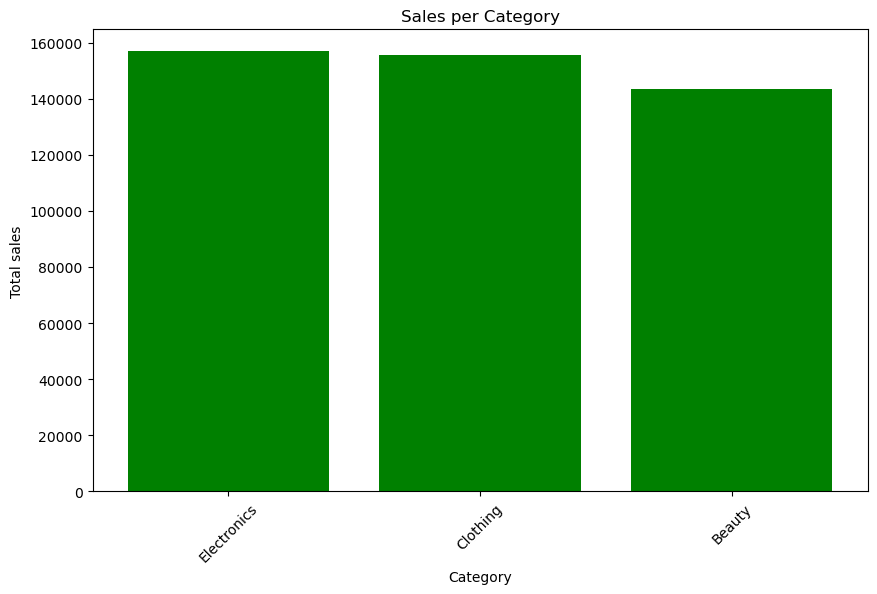

In [57]:
## 3. Which product categories hold the highest appeal among customers?
#plotting sales pr category
plt.figure(figsize=(10,6))
plt.bar(category_sales['Category'], category_sales['Total sales'], color='green')
plt.title('Sales per Category')
plt.xlabel('Category')
plt.ylabel('Total sales')
plt.xticks(rotation=45)
plt.show()

### key insights:
1. Electronics leads the sales figures by a margin, which could imply it is either a high-demand category, features premium products, or has a larger customer base.
2. The Beauty category lags behind the other two categories, with a noticeable difference of 13,065 in total sales compared to Electronics.

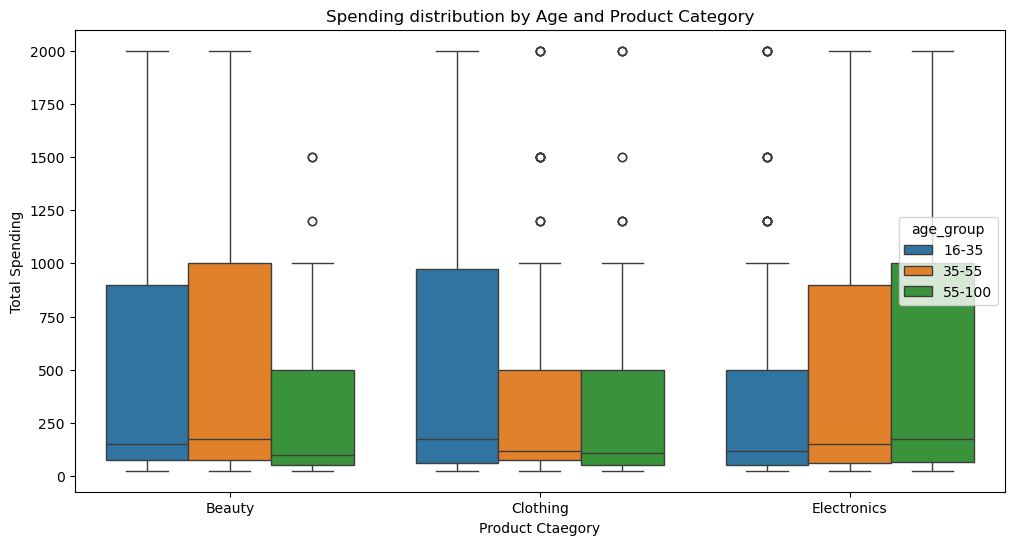

In [59]:
## What are the relationships between age, spending, and product preferences?
#create a box plot using a product category, age group and total amount

plt.figure(figsize=(12,6))
sns.boxplot(data=retail, x='Product Category', y='Total Amount', hue='age_group')
plt.title('Spending distribution by Age and Product Category')
plt.xlabel('Product Ctaegory')
plt.ylabel('Total Spending')
plt.show()

#### Key Insights:
1. The age group 16-35 tend to invest more in beauty and cloth which may be influenced by fashion trends and lifestyle
2. The age group 35-55 tend to invest more in beauty and electronics
3. The age group 55-100 have increased spending in electronics which may be influenced by thier age 

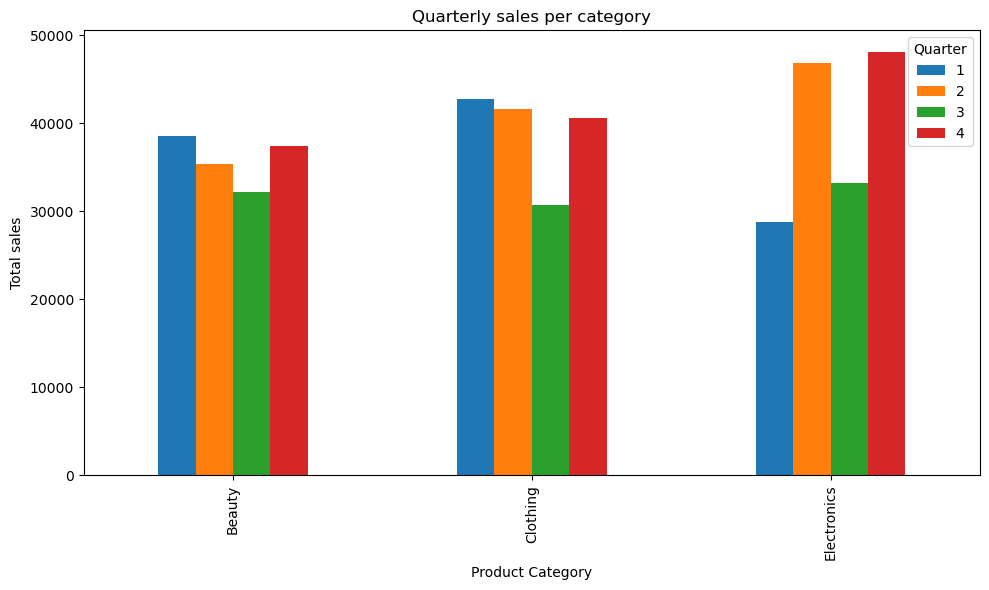

In [61]:
## 5. How do customers adapt their shopping habits during seasonal trends?
#group the product category and quarterand sum of the total amount
quarterly_sales = retail.groupby(['Product Category', 'Quarter'])['Total Amount'].sum().unstack()

# plotting the chart
quarterly_sales.plot(kind='bar', figsize=(10,6))
plt.title('Quarterly sales per category')
plt.xlabel('Product Category')
plt.ylabel('Total sales')
plt.legend(title='Quarter')
plt.tight_layout()
plt.show()

#### Key insights:
1. The seasonal sales trends shows that the 4th quarter(red) is the strongest quarter across all categories which may be influenced by festivities and holidays
2. The 1st quarter(Blue) is the highest in the clothing category which suggests that people tend to change their wardrobes in the begining of the year
3. The 2nd quarter(orange) is the second highest in the Electronics category which may be influenced by new product releases, so consumers may be eager to purchase latest technology, the 2nd quarter also includes graduation and wedding seasons, which can lead to increased gifting of electronics or smart home devices as wedding gifts
4. The 1st to 4th quarter are all lower in the beauty category compared to the clothing and Electronics category

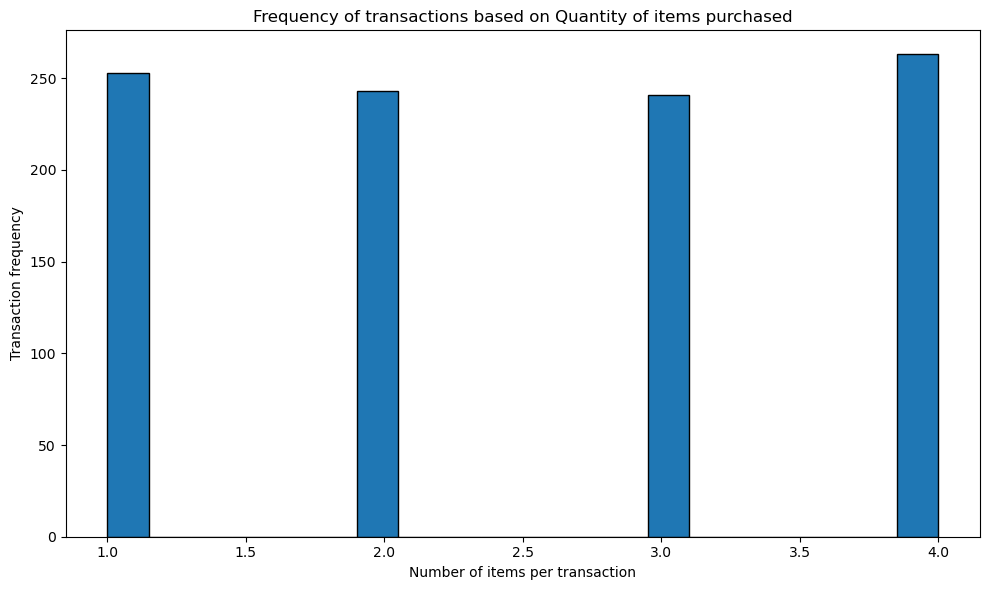

In [67]:
## 6. Are there distinct purchasing behaviors based on the number of items bought per transaction?

# plotting the frequency of transactions
plt.figure(figsize=(10,6))
plt.hist(retail['Quantity'], bins=20, edgecolor='black')
plt.title('Frequency of transactions based on Quantity of items purchased')
plt.xlabel('Number of items per transaction')
plt.ylabel('Transaction frequency')
plt.tight_layout()
plt.show()

### Key Observations:
1. Fom the chart, it shows that customers are likely to buy betweem 1 and 4 items, it suggests the inventory should be balanced to cater for a wide range of purchases
2. The consistent number of transactions with 2 or more items suggests that customers tend to buy more items when they shop, indicating a prefernce for bulk purchases

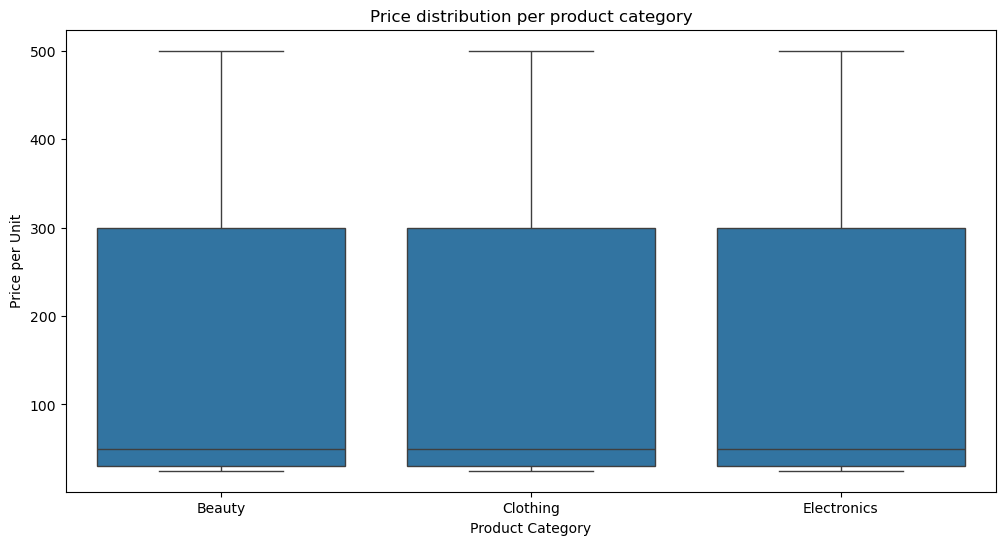

In [70]:
## 7. what insights can be gleaned from the distribution of product prices within each category?

plt.figure(figsize=(12, 6))
sns.boxplot(data=retail, x='Product Category', y='Price per Unit')
plt.title('Price distribution per product category')
plt.xlabel('Product Category')
plt.ylabel('Price per Unit')
plt.show()

### Key observations:
1. From the chart, all 3 categories have similar price range reaching up to 500 units
2. The median price for most of the items are priced to the lower end of the price spectrum